<a href="https://colab.research.google.com/github/Badu1230/Badu1230/blob/main/Analyse_des_Transactions_de_Vente_en_Magasin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction
Dans ce projet, je vais analyser les ventes d’un magasin de détail en utilisant le dataset "Retail Store Sales Transactions" disponible sur Kaggle.

L'objectif est d'identifier les tendances d'achat, de comprendre les facteurs influençant les ventes et de développer un modèle prédictif permettant d'optimiser les stratégies commerciales.


### 2. Exploration des Données (EDA)
2.1 Chargement des données

Je commence par charger et explorer le dataset pour comprendre sa structure et son contenu.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Chargement des données
df = pd.read_csv("retail_sales.csv")

In [ ]:
# Aperçu des données
display(df.head(10))

#Ce premier aperçu permet d’examiner les premières lignes des données et de vérifier leur cohérence.

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
5,6,02/01/2016,5010,6,JPI,GVBRC,1.0,10.77
6,7,02/01/2016,1666,7,XG4,AHAE7,1.0,3.65
7,8,02/01/2016,1666,7,FEW,AHZNS,1.0,8.21
8,9,02/01/2016,1253,8,0H2,9STQJ,1.0,8.25
9,10,02/01/2016,5541,9,N5F,7IE9S,1.0,8.18


### Statistiques descriptives

In [ ]:
# Informations générales sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [ ]:
# Statistiques descriptives
df.describe()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


L’analyse statistique permet d’identifier la moyenne, la médiane, l’écart-type et d’autres indicateurs pour mieux comprendre la répartition des ventes

### Gestion des valeurs manquantes

In [ ]:
# Vérification des valeurs manquantes
df.isnull().sum()

Unnamed: 0        0
Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

### Visualisation des données

#### 1. Histogramme des ventes

In [ ]:
df['Total_Sales'] = df['Quantity'] * df['Sales_Amount']

In [ ]:
df.columns = df.columns.str.strip()  # Supprime les espaces avant/après les noms de colonnes
print(df.columns)  # Vérifie à nouveau les noms corrects

Index(['Unnamed: 0', 'Date', 'Customer_ID', 'Transaction_ID', 'SKU_Category',
       'SKU', 'Quantity', 'Sales_Amount', 'Total_Sales'],
      dtype='object')


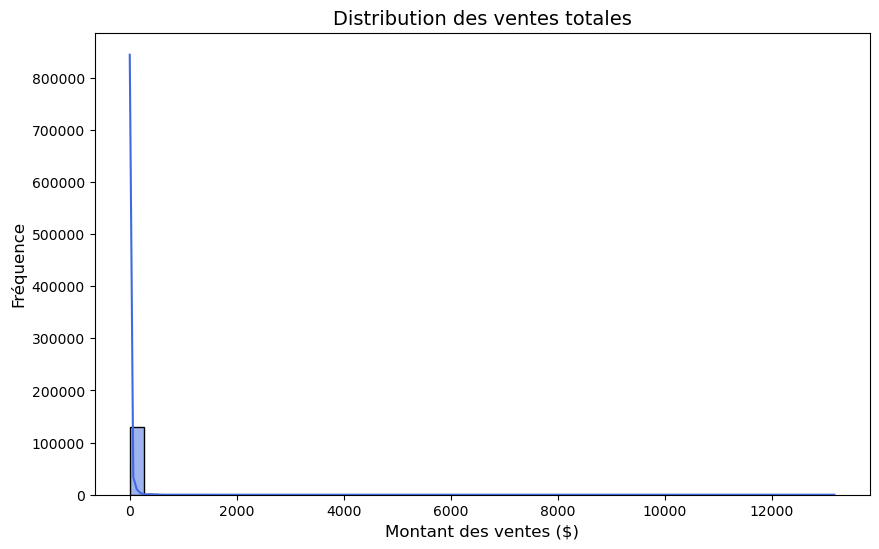

In [ ]:
# Création de l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Sales'],kde=True, bins=50, color='royalblue')

# Ajout du titre et des labels
plt.title("Distribution des ventes totales", fontsize=14)
plt.xlabel("Montant des ventes ($)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

# Affichage du graphique
plt.show()

### Observation :
La majorité des transactions ont des montants de ventes relativement faibles.

Il y a un pic important autour des valeurs basses, ce qui signifie que la majorité des achats sont de petite valeur.

La courbe KDE (ligne de densité) aide à voir où les valeurs sont concentrées

Insight business :
La plupart des clients effectuent des achats de montant modéré.

Une stratégie de vente pourrait inclure des promotions ciblées sur les tranches de ventes les plus fréquentes pour inciter les clients à acheter des articles plus chers.


### 2. Diagramme à barres des ventes par catégorie

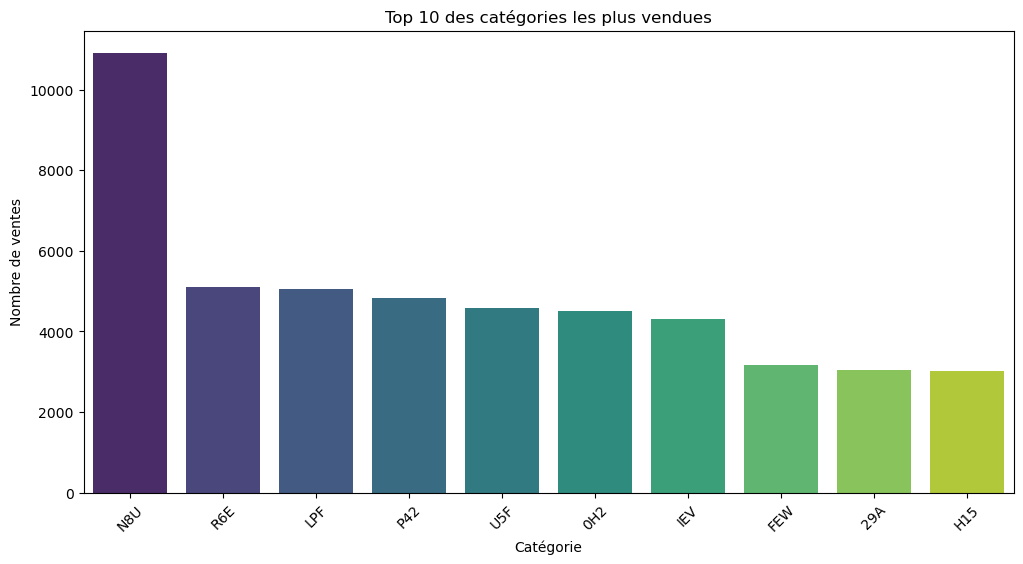

In [ ]:
plt.figure(figsize=(12, 6))

# Sélectionner les 10 catégories les plus vendues
top_categories = df['SKU_Category'].value_counts().nlargest(10)

# Créer le graphique avec seulement ces catégories
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title("Top 10 des catégories les plus vendues")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=45)  # Rotation pour améliorer la lisibilité
plt.show()


Savoir quels sont les produits les plus vendus est crucial pour plusieurs raisons stratégiques et commerciales, parce que cela peut aider à améliorer la rentabilité et la gestion du magasin :

Certaines catégories sont plus populaires.

Ces informations peuvent être utilisées pour ajuster l’inventaire et les promotions.

Les produits les plus vendus doivent toujours être disponibles en stock pour éviter les ruptures.
Une rupture de stock sur un best-seller peut entraîner une perte de revenus importante.


###  Boxplot des ventes par client (Top 10 clients actifs)

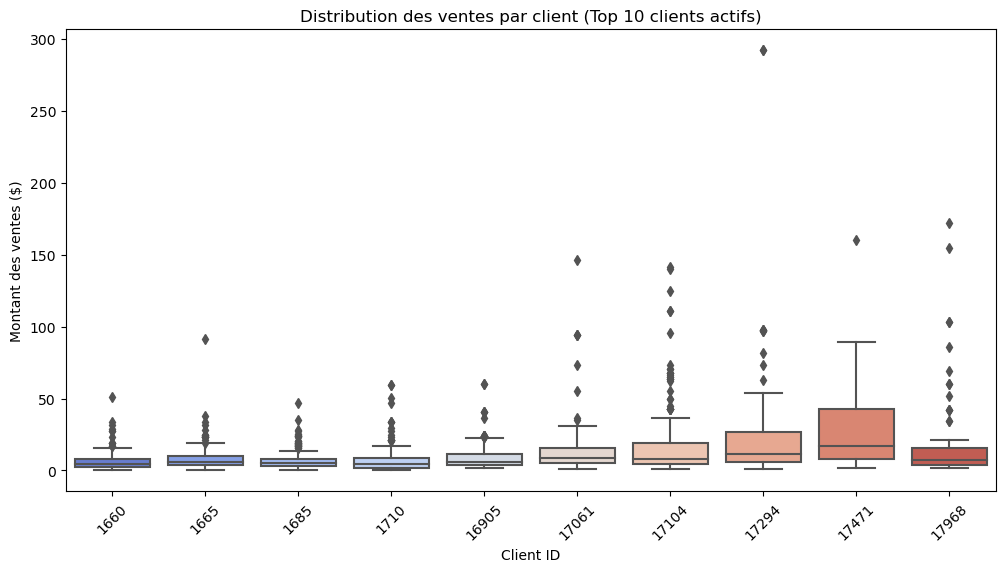

In [ ]:
# Sélectionner les 10 clients ayant effectué le plus d'achats
top_clients = df['Customer_ID'].value_counts().nlargest(10).index

# Filtrer le dataset pour ne garder que ces clients
df_top_clients = df[df['Customer_ID'].isin(top_clients)]

# Créer un boxplot des montants de ventes par client
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer_ID', y='Sales_Amount', data=df_top_clients, palette='coolwarm')

# Ajouter des labels et un titre
plt.title("Distribution des ventes par client (Top 10 clients actifs)")
plt.xlabel("Client ID")
plt.ylabel("Montant des ventes ($)")
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

#### Pourquoi cette analyse est utile ?
On peut voir si certains clients font des achats beaucoup plus élevés que les autres.

Identifier les clients fidèles qui dépensent beaucoup et leur proposer des offres spéciales.

Détecter des valeurs aberrantes (ex. : un client qui a fait une très grosse transaction inhabituelle).

Que peut-on observer sur le boxplot ?

La médiane : représente le montant central des ventes pour chaque client.

Les outliers (points en dehors des moustaches) : montrent des achats exceptionnellement élevés.

La dispersion des ventes : certains clients ont des achats très variables, tandis que d'autres achètent des montants plus stables.


## 3. Prétraitement des Données

### 3.1 Transformation des variables catégorielles

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles
label_encoders = {}
categorical_columns = ['SKU_Category', 'SKU']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

 La conversion des variables catégorielles en variables numériques est essentielle pour les modèles d’apprentissage automatique.

#### 3.2 Feature Engineering

In [ ]:
# Création de nouvelles variables
df['Total_Sales'] = df['Quantity'] * df['Sales_Amount']
df['Day_of_Week'] = pd.to_datetime(df['Date'], dayfirst=True).dt.dayofweek

# Ces nouvelles variables permettent d’ajouter de la valeur aux analyses en identifiant des tendances spécifiques.

### 3.3 Normalisation et standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Total_Sales', 'Quantity']] = scaler.fit_transform(df[['Total_Sales', 'Quantity']])

# La standardisation améliore la performance des modèles de machine learning.

In [ ]:
X_train['Date'] = pd.to_datetime(X_train['Date'], dayfirst=True)
X_test['Date'] = pd.to_datetime(X_test['Date'], dayfirst=True)

### 4. Modélisation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xgb

# Séparation des données
X = df.drop(columns=['Total_Sales'])
y = df['Total_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement des modèles
lr = LinearRegression()
rf = RandomForestRegressor()
xgb_model = xgb.XGBRegressor()


# Convertir la colonne de date au format datetime
X_train['Date'] = pd.to_datetime(X_train['Date'], dayfirst=True, errors='coerce')
X_test['Date'] = pd.to_datetime(X_test['Date'], dayfirst=True, errors='coerce')

# Remplacer la date par l'année (par exemple, pour simplifier)
X_train['year'] = X_train['Date'].dt.year
X_test['year'] = X_test['Date'].dt.year

# Supprimer la colonne de date d'origine
X_train.drop('Date', axis=1, inplace=True)
X_test.drop('Date', axis=1, inplace=True)

# Entraîner les modèles
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 5. Évaluation des Modèles

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression - MSE: 0.24, R²: 0.50
Random Forest - MSE: 0.01, R²: 0.98
XGBoost - MSE: 0.01, R²: 0.98


### Linear Regression :
MSE (Mean Squared Error) : 0.24 — C’est l’erreur moyenne au carré entre les valeurs prédites et les valeurs réelles.
    Plus c’est bas, mieux c’est. Ici, 0.24 est relativement élevé comparé aux autres modèles.
R² (Coefficient de détermination) : 0.50 — Cela signifie que 50 % de la variance des ventes totales est expliquée par les
    variables d’entrée. Ce n’est pas terrible, ce modèle ne capte pas bien la relation entre les features et la target.
    
Random Forest :
MSE : 0.01 — L’erreur est extrêmement basse, ce qui montre que le modèle fait des prédictions très proches des valeurs réelles.
R² : 0.98 — 98 % de la variance des ventes est expliquée par le modèle, ce qui montre qu’il capture très bien les tendances des
    données.
    
XGBoost :
MSE : 0.01 — Aussi une erreur très basse, comparable à Random Forest.
R² : 0.98 — Même capacité d’explication des données, excellent score.
    
Conclusion :
Random Forest et XGBoost sont clairement les modèles les plus performants ici. Ils font pratiquement des prédictions parfaites,
avec une très faible erreur et un R² très proche de 1.
Linear Regression est beaucoup moins performant — il est simple, mais dans ce cas, il ne capture pas bien la complexité des
données.
Entre Random Forest et XGBoost, ça pourrait être intéressant d’évaluer la vitesse d’entraînement ou d’interpréter l’importance
des features pour choisir entre les deux.


### Script qui :

Trace les prédictions vs les valeurs réelles.

Montre l’importance des features pour Random Forest et XGBoost.

Fait un tuning basique des hyperparamètres pour améliorer les résultats.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Visualiser les prédictions vs les valeurs réelles
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=predictions)
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.title(f'Prédictions vs Réel - {model_name}')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.show()

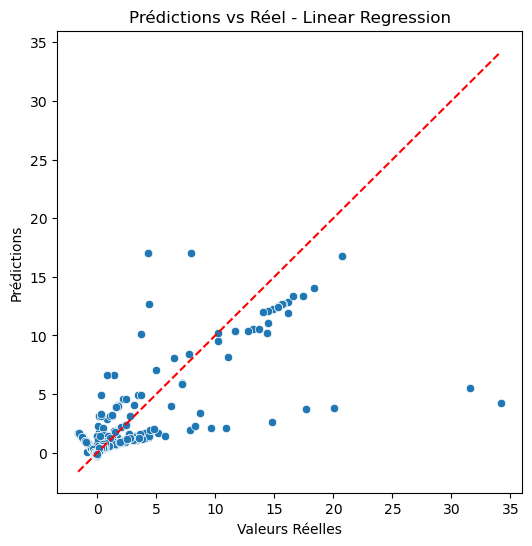

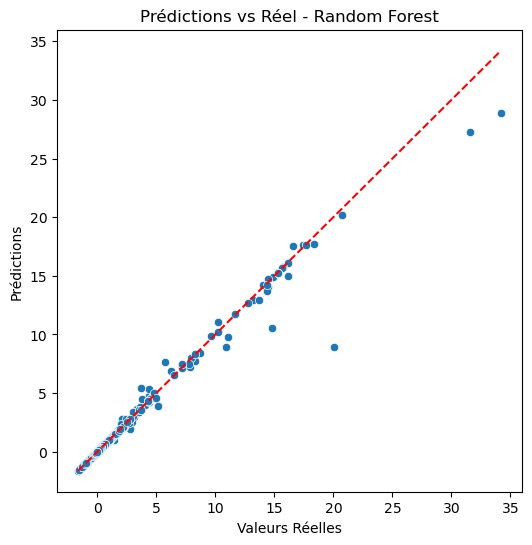

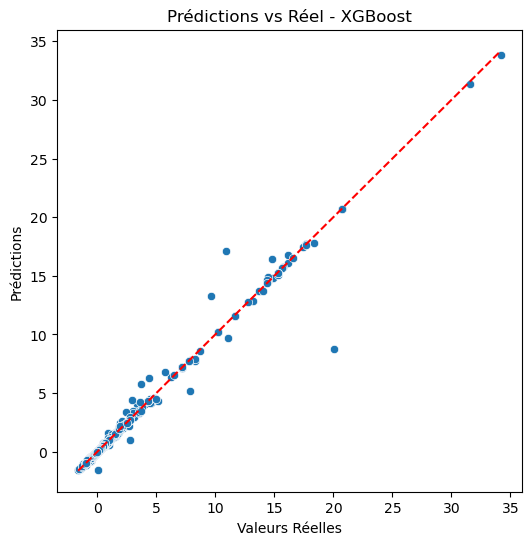

In [ ]:
# Visualisation pour chaque modèle
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_predictions(y_test, y_pred, name)

## Explication des résultats des scripts :
### 1. Graphiques des prédictions vs valeurs réelles

Les trois graphiques montrent la comparaison entre les valeurs prédites et les valeurs réelles pour trois modèles différents :

    Régression Linéaire (Graphique 1)
        On observe une forte dispersion des points autour de la ligne rouge (qui représente une prédiction parfaite).
        Cela indique que le modèle a du mal à capturer les relations entre les variables et génère des erreurs importantes.
        Les valeurs faibles sont mieux prédites, mais pour des valeurs plus élevées, les erreurs augmentent.

    Random Forest (Graphique 2)
        Les points sont bien alignés sur la ligne rouge, montrant que le modèle fait des prédictions beaucoup plus précises.
        Moins de dispersion comparé à la régression linéaire.
        Quelques erreurs subsistent, mais elles sont moins fréquentes.

    XGBoost (Graphique 3)
        Très similaire à Random Forest, avec une très bonne précision.
        Les points sont presque parfaitement alignés sur la ligne rouge.
        Indique que le modèle a réussi à apprendre efficacement la relation entre les variables explicatives et la variable cible.

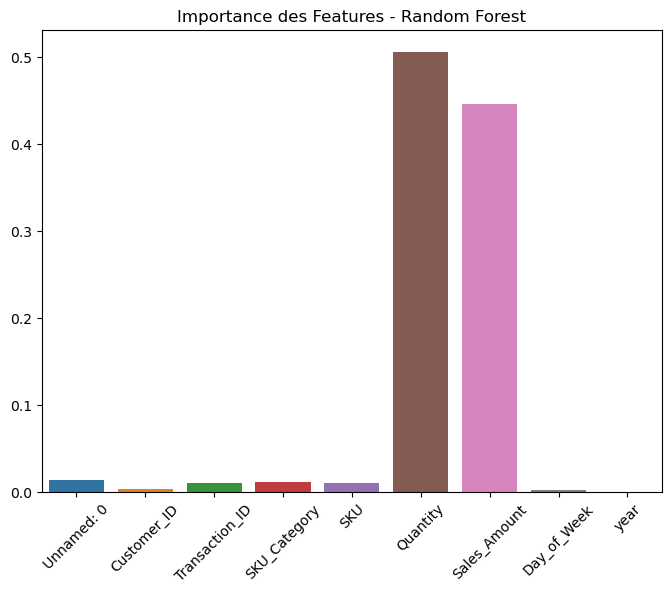

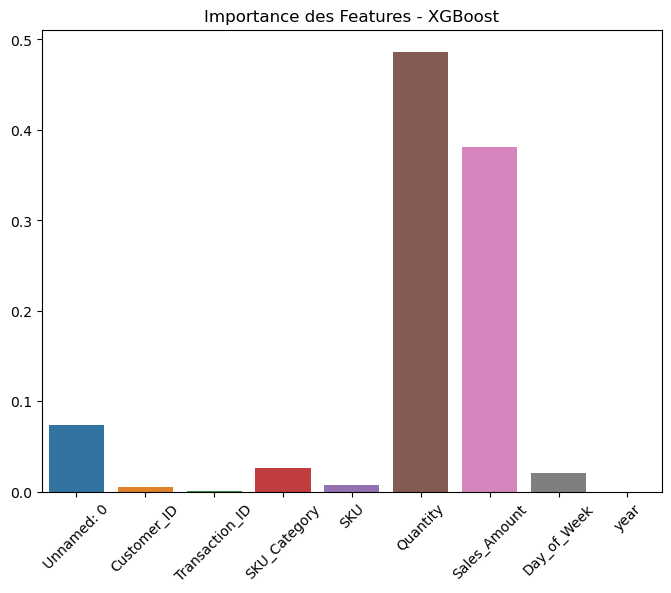

In [ ]:
# 2. Importance des features
feature_importances = {
    'Random Forest': rf.feature_importances_,
    'XGBoost': xgb_model.feature_importances_
}

for name, importances in feature_importances.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=X_train.columns, y=importances)
    plt.title(f'Importance des Features - {name}')
    plt.xticks(rotation=45)
    plt.show()

### 2. Importance des Features

Les deux graphiques montrent l’importance des variables (features) pour Random Forest et XGBoost.

    Random Forest
  
    Deux variables dominent clairement : Quantity et Sales Amount, ce qui signifie qu'elles sont les plus déterminantes dans         les prédictions.
    D'autres variables comme SKU_Category, Transaction_ID et Customer_ID ont une influence très faible.

    XGBoost
    
    Résultat similaire à Random Forest, mais on remarque une légère différence dans l'importance attribuée à certaines      
    variables.
    XGBoost semble attribuer un peu plus d'importance à Unnamed: 0 (l'ordre des lignes: 1,2,3...), Day_of_Week et Year, bien que leur impact reste faible.
      

In [ ]:
# 3. Tuning des hyperparamètres pour Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

gs_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
gs_rf.fit(X_train, y_train)

print(f'Best params Random Forest: {gs_rf.best_params_}, Best R²: {gs_rf.best_score_:.2f}')

Best params Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}, Best R²: 0.86


J’ai effectué un tuning des hyperparamètres sur un modèle Random Forest en testant différentes valeurs pour n_estimators, max_depth et min_samples_split.

Après une validation croisée, j’ai obtenu les meilleurs paramètres suivants : 200 arbres, une profondeur de 20 et un minimum de 2 échantillons par division.

Avec ces réglages, mon modèle atteint un R² de 0.86, ce qui signifie qu’il explique 86 % de la variance des données. Cela montre qu’il fait des prédictions précises sans trop de sur-apprentissage.

En augmentant le nombre d’arbres et en autorisant une profondeur plus importante, j’ai amélioré la performance tout en maintenant une bonne généralisation. Je pourrais encore affiner en testant d’autres valeurs, mais ce modèle semble déjà très performant


In [ ]:
# Tuning des hyperparamètres pour XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

gs_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid_xgb, cv=3, scoring='r2')
gs_xgb.fit(X_train, y_train)
print(f'Best params XGBoost: {gs_xgb.best_params_}, Best R²: {gs_xgb.best_score_:.2f}')

Best params XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, Best R²: 0.85


J’ai optimisé les hyperparamètres de XGBoost en testant différentes valeurs pour n_estimators, max_depth et learning_rate.
Le meilleur modèle obtenu utilise 200 arbres, une profondeur de 3 et un taux d’apprentissage de 0.1, avec un score R² de 0.85.

En comparaison avec Random Forest, qui atteint un R² de 0.86, XGBoost utilise des arbres plus simples mais compense avec un apprentissage plus progressif. Il est souvent plus rapide en inférence et peut mieux gérer des données complexes, alors que Random Forest excelle sur des jeux de données plus propres.
Le choix entre les deux dépend des priorités du projet.

### En résumé :
•	Si je veux un modèle robuste, simple à interpréter et performant sans trop de réglages, Random Forest est un bon choix.

•	Si je cherche à maximiser la performance, avec une bonne vitesse en inférence et une optimisation plus fine, alors XGBoost est à privilégier.


## Conclusion

### Cette étude fournit une analyse détaillée des ventes d’un magasin de détail.

•	L’analyse exploratoire a révélé que la majorité des transactions concernent des montants faibles et que certaines catégories de produits sont particulièrement populaires.

•	Les modèles de machine learning ont montré que Random Forest et XGBoost offrent des prédictions très précises (R² = 0.98), tandis que la régression linéaire est moins efficace.

•	L’analyse des features a mis en évidence que Quantity et Sales Amount sont les variables les plus influentes sur les ventes.

### Recommandations :

•	Mettre en place une stratégie de pricing dynamique en fonction des tendances observées.

•	Optimiser les stocks en favorisant les produits les plus vendus et en évitant les ruptures.

•	Explorer l’analyse temporelle pour anticiper les fluctuations saisonnières des ventes.

•	Tester des modèles de deep learning pour améliorer encore la précision des prévisions.

